### Explainable AI with Shap

This notebook adapts the [official Shap tutorial](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import shap

import iml_playground as iml

In [2]:
dataset = "simple-regression"
# dataset = "car-insurance-cold-calls"

In [3]:
config = {"simple-regression": {"target": "Target", "model": LinearRegression()}, "car-insurance-cold-calls": {"target": "CarInsurance", "model": RandomForestClassifier()}}

In [4]:
train = pd.read_csv(f"../resources/data/{dataset}/train.csv")
test = pd.read_csv(f"../resources/data/{dataset}/test.csv")

In [5]:
ds = iml.Dataset(train, test, target=config[dataset]["target"])
ds.sample.head(2)

,PredictiveFeature,PredictiveFeatureCorrelated,PredictiveFeatureWithNoise,RandomFeature,Target
0,0.3578,0.3936,-1.4835,0.5608,10.0908
1,1.0831,1.1914,2.7908,1.0538,30.5458


In [6]:
X, y = ds.X_train, ds.y_train
X.head(2)

,PredictiveFeature,PredictiveFeatureCorrelated,PredictiveFeatureWithNoise,RandomFeature
0,0.4967,0.5464,-0.2965,-0.1383
1,0.6477,0.7124,-4.5306,1.5230


In [7]:
model = config[dataset]["model"]
model = model.fit(X, y)

if hasattr(model, "coef_"):
    print("Model coefficients:\n")
    for i in range(X.shape[1]):
        print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

PredictiveFeature = 17.0983
PredictiveFeatureCorrelated = 10.0956
PredictiveFeatureWithNoise = -0.0
RandomFeature = 0.0


In [8]:
X_sample = shap.utils.sample(X, nsamples=100)

In [9]:
explainer = shap.Explainer(model=model.predict, masker=X_sample)
shap_values = explainer(X_sample)

### Global explanations

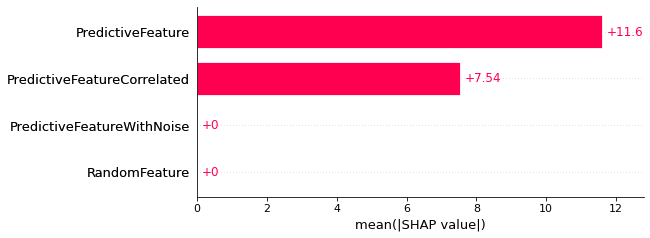

In [10]:
shap.plots.bar(shap_values)

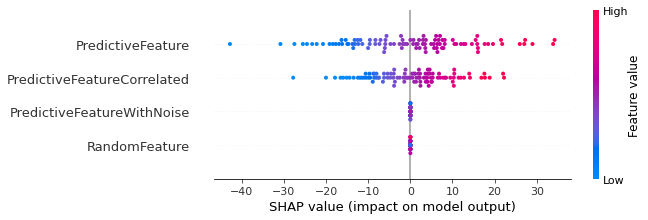

In [11]:
shap.plots.beeswarm(shap_values)

In [12]:
top_index = np.abs(shap_values.values).mean(axis=0).argmax()
top_feature = shap_values.feature_names[top_index]

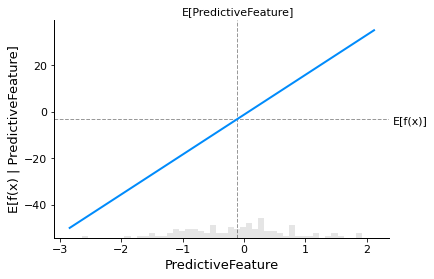

In [13]:
shap.plots.partial_dependence(
    ind=top_feature, model=model.predict, data=X_sample, ice=False,
    model_expected_value=True, feature_expected_value=True
)

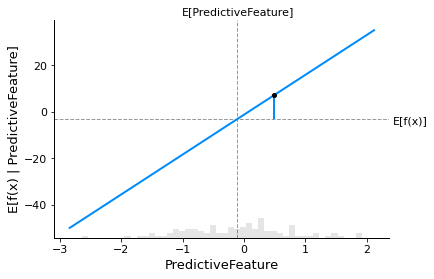

In [14]:
sample_id = 0

shap.partial_dependence_plot(
    ind=top_feature, model=model.predict, data=X_sample, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_id:sample_id+1,:]
)

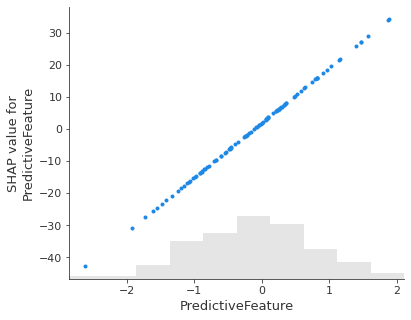

In [15]:
shap.plots.scatter(shap_values[:,top_feature])

### Local Explanations

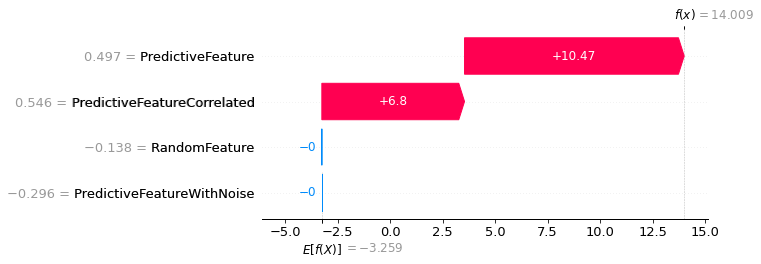

In [16]:
shap.plots.waterfall(shap_values[sample_id])